# Data Exploration - DTC Prediction Project

This notebook was used to explore the dataset provided by the SPWLA. 

The workflow comprises stastical analysis, data visualization, data coverage, cleaning and data processing (feature engineering).

The exploration and analysis reproduced within this notebook was used to create the process_data.py script. This script will be versioned with Git, allowing us to control and version our code properly. Version control with jupyter notebooks is not recommended.

In [1]:
# This cell imports the libraries used throughout this notebook
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [2]:
# This cell loads the raw data as pandas DataFrames
file_path = '../data/raw/'

dataset = pd.read_csv(file_path + 'sonic_data_train.csv')
test_dataset = pd.read_csv(file_path + 'sonic_data_test.csv')
y_test = pd.read_csv(file_path + 'sonic_test_results.csv')

In [3]:
# Looking at the first 5 rows of the dataset
dataset.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


## 1. Basic statistics

In [4]:
# Basic statistical analysis of the data
# We might try to observe here if there are any anomalous values
dataset.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


In [5]:
# We observed in the cells above that the null values (-999)
# are distorting the statistical analysis
# This cell first replaces it 
dataset = dataset.replace(-999, np.nan)
test_dataset = test_dataset.replace(-999, np.nan)

In [6]:
# Basic statistical analysis of the data after removing nulls
dataset.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,29633.000000,29408.000000,29889.000000,29758.000000,29758.000000,29464.000000,29462.000000,26089.000000,25278.000000
mean,8.654281,0.683437,47.780541,16.953912,14.492077,5.173227,2.393818,91.814381,180.655730
std,1.749145,30.689679,51.377519,349.067878,445.361622,4.781088,0.196276,24.337910,81.141960
min,5.930400,-0.102800,-0.146000,0.054100,0.061600,-0.023200,-1.923800,49.970500,80.580400
25%,8.135600,0.127100,18.026100,0.740450,0.734700,0.054200,2.234800,71.357000,129.446625
50%,8.625000,0.198500,37.082200,1.662750,1.665150,5.042500,2.439600,85.237600,144.593050
75%,9.063000,0.343100,58.532800,3.180350,3.308900,7.949700,2.553000,112.112600,191.475125
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


## 2. Data Visualization

In [7]:
def plot_log(dataset : pd.DataFrame) -> None:
    """This function pots the data as usually seen in logs.
    
    Args:
        dataset (pd.DataFrame): dataset containing the features and/or
        the target (DTC).   
    """
    

    fig, ax = plt.subplots(1, 5, figsize = (15, 10), sharey = True)

    y = range(1, len(dataset.GR) + 1)

    ax[0].set_title('Caliper')
    ax[0].plot(dataset.CAL, y, 'k-')
    ax[0].set_xlim(0, 20)
    ax[0].grid()

    ax[1].set_title('Gamma Ray')
    ax[1].plot(dataset.GR, y, 'g-')
    ax[1].set_xlim(0, 150)
    ax[1].grid()

    ax[2].set_title('Resistivity')
    ax[2].semilogx(dataset.HRD, y, color = 'r',
               label = 'Deep Res.', linewidth = '0.5')
    ax[2].semilogx(dataset.HRM, y, color = 'm',
               label = 'Med. Res.', linewidth = '0.5')
    ax[2].set_xlim(0.2 , 2000)
    ax[2].set_xticks([0.2, 2, 20, 200, 2000])
    ax[2].set_xticklabels([0.2, 2, 20, 200, 2000])
    ax[2].grid()

    ax[3].set_title('Bulk Density', color = 'r', fontsize = 12)
    ax[3].plot(dataset.CNC, y,
             label = 'Neutron', color = 'b', linewidth = '0.5')
    ax[3].tick_params(axis='x', labelcolor='b')
    ax[3].set_xlim(-0.15, 0.45)
    ax[3].set_xticks(np.linspace(-0.15,0.45,4))
    ax[3].set_xlabel('Neutron', color = 'b', fontsize = 12)
    ax[3].invert_xaxis()
    axtwin3 = ax[3].twiny()
    axtwin3.plot(dataset.ZDEN, y,
           label = 'Bulk Density', color = 'r', linewidth = '0.5')
    axtwin3.tick_params(axis='x', labelcolor= 'r')
    axtwin3.set_xlim(2, 3)
    axtwin3.set_xticks(np.linspace(2,3,5))  
    axtwin3.grid()
    ax[3].grid()
    
    if 'DTC' in dataset.columns:

        ax[4].set_title('Sonic')
        ax[4].plot(dataset.DTC, y, color = 'k',
                 label = 'Sonic (DTC)', linewidth = '0.5')
        ax[4].plot(dataset.DTS, y, color = 'r',
                 label = 'Sonic (DTS', linewidth = '0.5')
        ax[4].set_xlim(40,400)
        ax[4].legend()
        ax[4].grid()
        ax[4].invert_xaxis()
        
    else:
        
        ax[4].remove()

    
    ax[0].set_ylim(0, y[-1])
    ax[0].invert_yaxis()


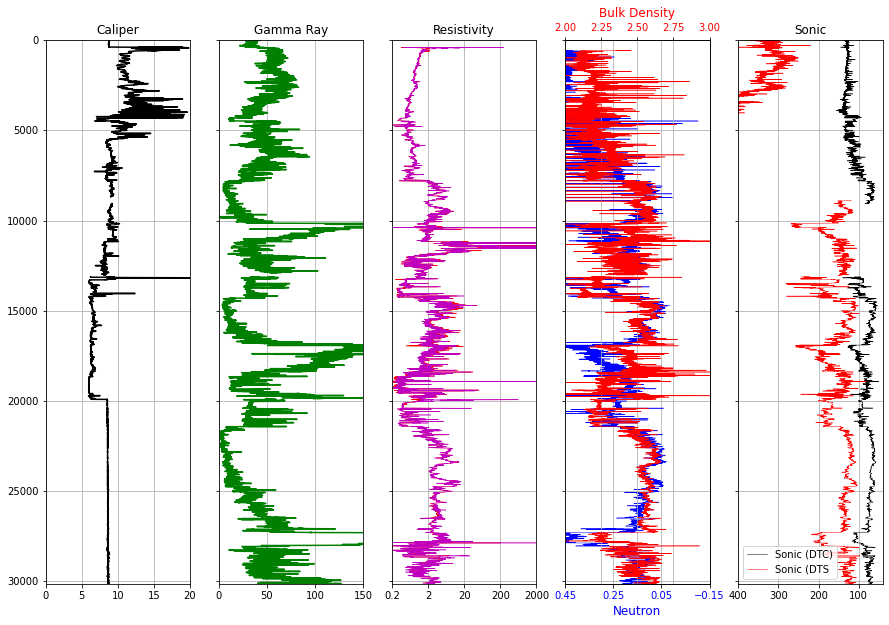

In [8]:
plot_log(dataset) # Training dataset

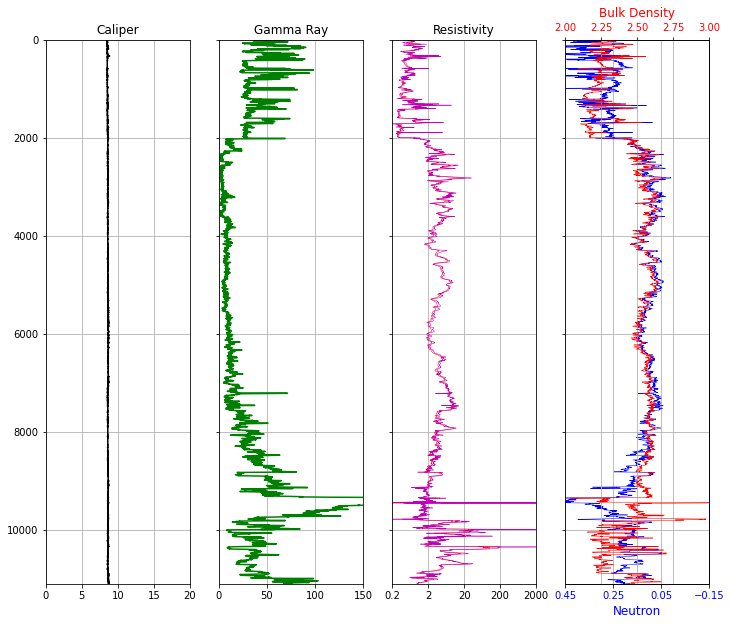

In [9]:
plot_log(test_dataset) # Test dataset

## 3. Data coverage

In this phase we observe the coverage of the data. Null values can be either removed or replaced with a significant value, such as the mean or median values. We chose to eliminate rows containing null values.

<AxesSubplot:>

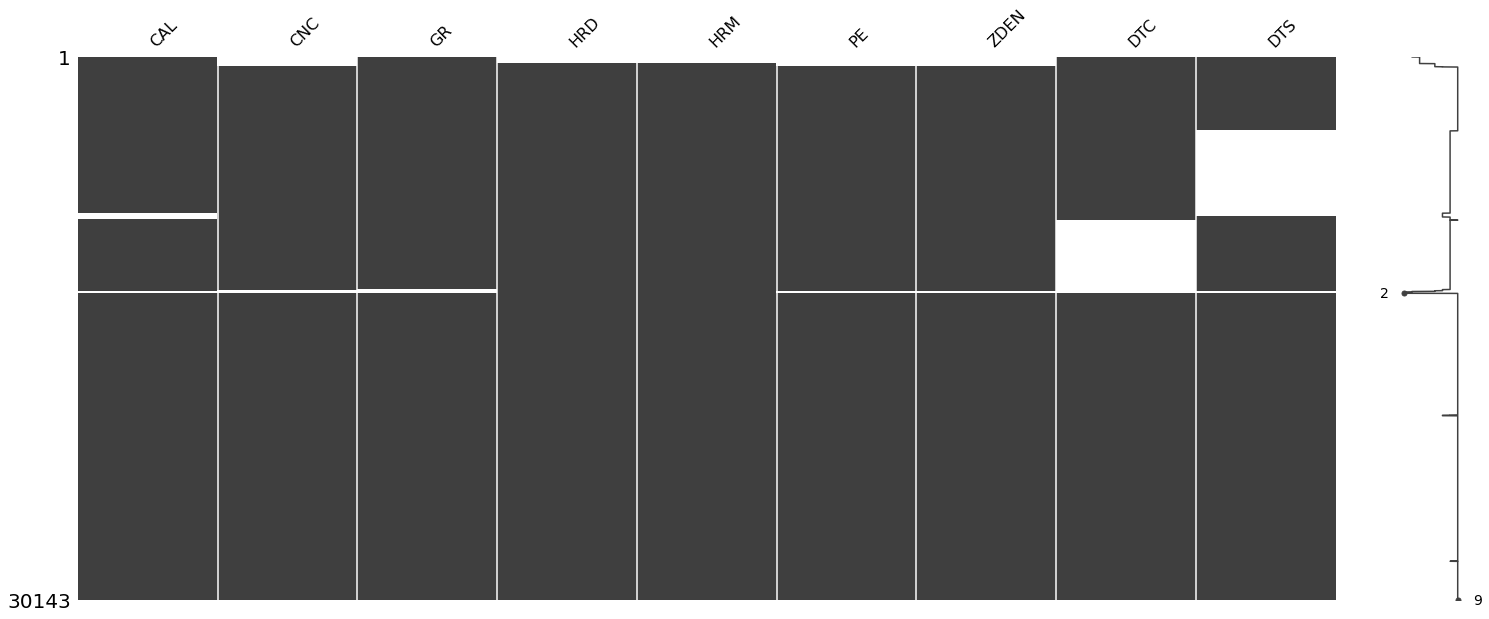

In [10]:
# This cell allows us to see the data coverage
# Blank spaces represent NaNs (null values)
# Gray spaces represent the presence of data
msno.matrix(dataset)

In [11]:
dataset.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,29633.000000,29408.000000,29889.000000,29758.000000,29758.000000,29464.000000,29462.000000,26089.000000,25278.000000
mean,8.654281,0.683437,47.780541,16.953912,14.492077,5.173227,2.393818,91.814381,180.655730
std,1.749145,30.689679,51.377519,349.067878,445.361622,4.781088,0.196276,24.337910,81.141960
min,5.930400,-0.102800,-0.146000,0.054100,0.061600,-0.023200,-1.923800,49.970500,80.580400
25%,8.135600,0.127100,18.026100,0.740450,0.734700,0.054200,2.234800,71.357000,129.446625
50%,8.625000,0.198500,37.082200,1.662750,1.665150,5.042500,2.439600,85.237600,144.593050
75%,9.063000,0.343100,58.532800,3.180350,3.308900,7.949700,2.553000,112.112600,191.475125
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


In [12]:
# Eliminates NaNs from the data
dataset = dataset.dropna(how = 'any')

<AxesSubplot:>

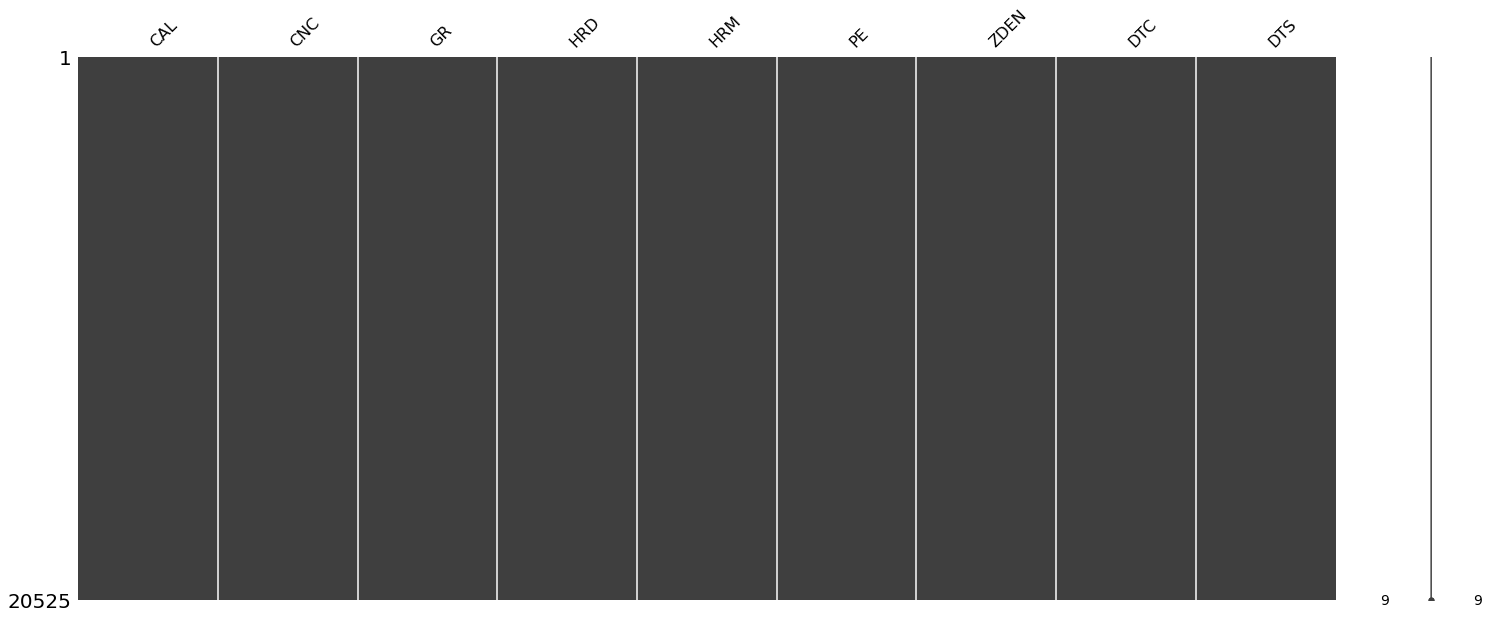

In [13]:
# Looking at the data coverage after removing NaNs
msno.matrix(dataset)

## 4. Data cleaning and Feature Engineering

This phase is reposible for removing outliers and then transforming the data by either creating new features or applying mathematical procedures, such as transforming distributions and normalizing the data.

### 4.1 Crossplots

We can look at crossplots in order to observe the relationship between features of interest. The cell below creates three crossplots:
1. Bulk Density vs Neutron;
2. Bulk Density vs Sonic (DTC);
3. Sonic (DTC) vs Neutron;

Afterwards we can observe if there are any outliers and the eliminate the.

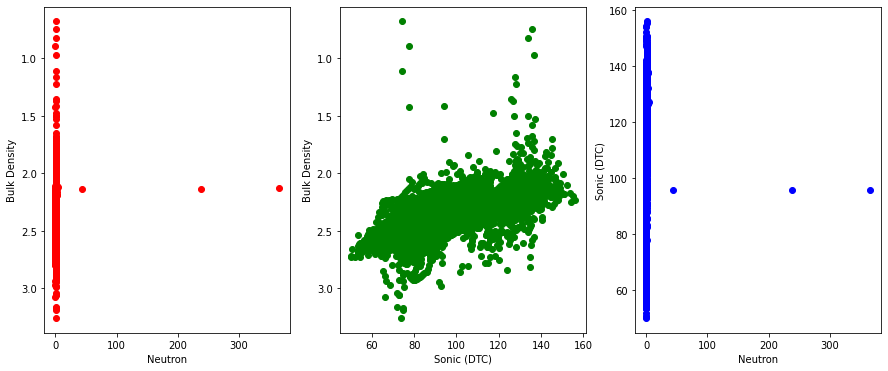

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (15, 6))

ax[0].scatter(dataset.CNC, dataset.ZDEN, c = 'red')
ax[0].set_ylabel('Bulk Density')
ax[0].set_xlabel('Neutron')
ax[0].invert_yaxis()
ax[1].scatter(dataset.DTC, dataset.ZDEN, c = 'green')
ax[1].set_ylabel('Bulk Density')
ax[1].set_xlabel('Sonic (DTC)')
ax[1].invert_yaxis()
ax[2].scatter(dataset.CNC, dataset.DTC, c = 'blue')
ax[2].set_xlabel('Neutron')
ax[2].set_ylabel('Sonic (DTC)');

In [15]:
# This cell defines the limits for bulk density, neutron and sonic (dtc)
# We'll use these limits to eliminate data outside of them
density_lower_limit = 1.75
density_upper_limit = 3

neutron_lower_limit = -0.2
neutron_upper_limit = 1

sonic_lower_limit = 40
sonic_upper_limit = 160

In [16]:
# This cell clens the data using the limits above
dataset = dataset[
    ((dataset.ZDEN > density_lower_limit) & (dataset.ZDEN < density_upper_limit))
    & ((dataset.CNC > neutron_lower_limit) & (dataset.CNC < neutron_upper_limit))
    & ((dataset.DTC > sonic_lower_limit) & (dataset.DTC < sonic_upper_limit))
]

Now, we can look at the same dataset after the outliers were removed:

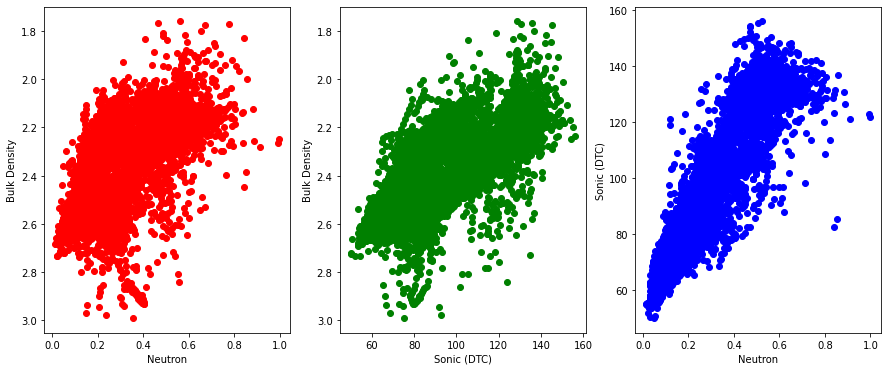

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (15, 6))

ax[0].scatter(dataset.CNC, dataset.ZDEN, c = 'red')
ax[0].set_ylabel('Bulk Density')
ax[0].set_xlabel('Neutron')
ax[0].invert_yaxis()
ax[1].scatter(dataset.DTC, dataset.ZDEN, c = 'green')
ax[1].set_ylabel('Bulk Density')
ax[1].set_xlabel('Sonic (DTC)')
ax[1].invert_yaxis()
ax[2].scatter(dataset.CNC, dataset.DTC, c = 'blue')
ax[2].set_xlabel('Neutron')
ax[2].set_ylabel('Sonic (DTC)');

In [18]:
dataset.describe() # Basic statistics after removing these outliers

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000,20454.000000
mean,8.420051,0.240311,49.864116,2.604634,5.852623,3.815072,2.412081,88.213528,181.641846
std,1.840255,0.159935,54.893783,3.470131,423.182093,4.365889,0.177096,23.482068,84.289513
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,1.760900,49.970500,80.580400
25%,6.628050,0.120100,15.872350,0.811950,0.799175,0.049700,2.236700,70.392800,127.103800
50%,8.578100,0.187100,37.415300,1.826250,1.841050,3.021700,2.467200,79.622550,142.594200
75%,8.671900,0.327400,61.105575,3.346150,3.468725,7.044650,2.563800,102.197550,192.506250
max,21.064200,0.998600,1470.253400,206.718200,60467.761700,28.106400,2.989900,155.980300,487.438400


### 4.2 Distributions

Another method that we can use to observe outliers is looking at the distributions of the data. We might see outliers by observing 'strange values' that could be considered invalid according to our petrophysics knowledge.

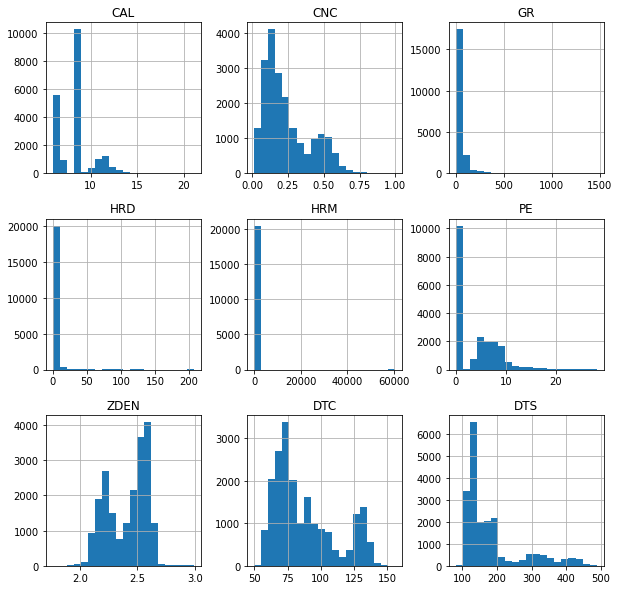

In [19]:
dataset.hist(figsize = (10, 10), bins = 20);

In [20]:
np.percentile(dataset.HRM, 99.9), np.percentile(dataset.GR, 99.9)

(38.33259090000176, 406.98109530000653)

In [21]:
# This cell defines the limits for gamma ray and medium resistivity
# We'll use these limits to eliminate data outside of them
gamma_lower_limit = 0
gamma_upper_limit = np.percentile(dataset.GR, 99.9)

hrm_lower_limit = 0
hrm_upper_limit = np.percentile(dataset.HRM, 99.9)

In [22]:
# This cell clens the data using the limits above
dataset = dataset[
    ((dataset.GR > gamma_lower_limit) & (dataset.GR < gamma_upper_limit))
    & ((dataset.HRM > hrm_lower_limit) & (dataset.HRM < hrm_upper_limit))
]

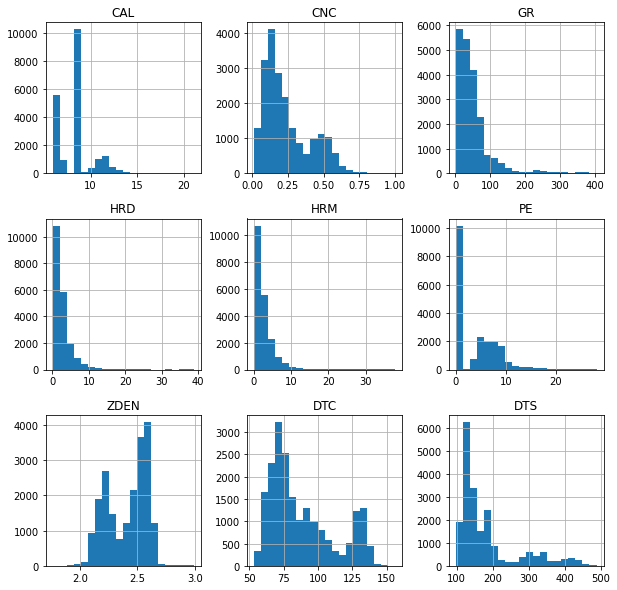

In [23]:
dataset.hist(figsize = (10, 10), bins = 20);

### 4.3 Power Transformation

With a power transformation we can try to make data more Gaussian-like. This is helpful because neural networks and other machine learning models tend to perform better with normal distributions and normalized data.

In [24]:
# Import the PowerTransformer from sklearn library
from sklearn.preprocessing import PowerTransformer

In [25]:
# Instantiate a Power transformer object
yj = PowerTransformer()

In [26]:
# Transform the features in the training dataset
x_train = yj.fit_transform(dataset.iloc[:, :-2])

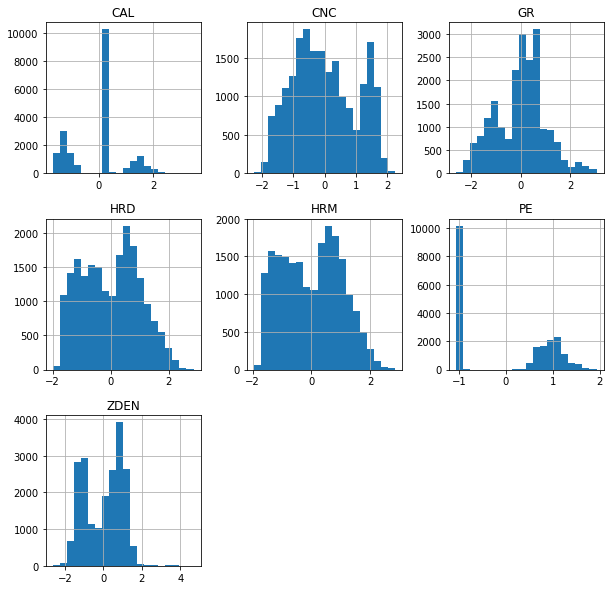

In [27]:
# Visualization of the data after the transformation was applied
pd.DataFrame(x_train, columns = dataset.iloc[:, :-2].columns).hist(figsize = (10, 10), bins = 20);